In [165]:
# Import relevant libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

Begin by reading the Iris data set (Iris.csv) into a Jupyter notebook and name it iris_logistic_regression.ipynb

In [166]:
# Read in the dataset from Iris.csv
iris_df = pd.read_csv('Iris.csv')

iris_df.head() # Check using head if data is read correctly

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Identify your independent variables x

In [167]:
# Identify independent variable from Iris.csv and assign X as independent variables from iris_df
independent_variables = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
X = iris_df[independent_variables]

Encode your dependent variable y such that ‘Iris-setosa' is encoded as 0, and 'Iris-versicolor' and 'Iris-virginica' are both encoded as 1. (0 corresponds to the 'Iris-setosa' class, and 1 corresponds to the
not-‘Iris-setosa' class.)

In [168]:
# Dependent variable is 'Species' and it has 3 classification use binary to assign 'Iris-setosa' as 0 and other 
# 2 classications 'Iris-versicolor' and 'Iris-virginica' as 1.
dependent_variable = iris_df['Species']
y = (dependent_variable != 'Iris-setosa').astype(int)

Split the data into a training and test set

In [169]:
# Split the data into training set and test set test_size used is 80/20
rseed = 23
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rseed)

print("Training data : ", X_train.shape, y_train.shape)
print("Testing data: ", X_test.shape, y_test.shape)


Training data :  (120, 4) (120,)
Testing data:  (30, 4) (30,)


Use sklearn’s logistic regression function to fit a model and make predictions on the test set.

In [170]:
# Using logistic regression make predictions on the test set
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Use sklearn to generate a confusion matrix, which compares the predicted labels to the actual labels (gold labels).


Confusion Matrix:  [[12  0]
 [ 0 18]]


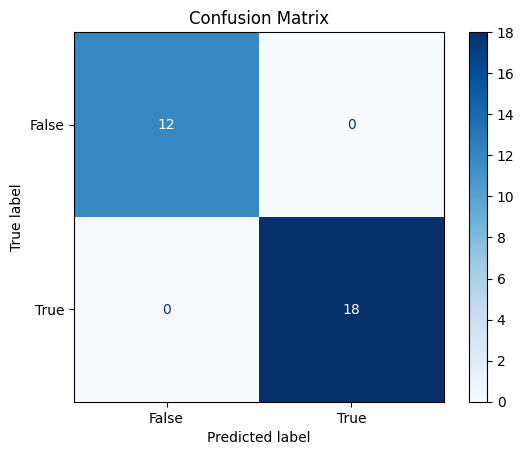

In [171]:
# Generate the confusion matrix based on the predictions and compare it to the actual label.
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: ",conf_matrix)

# Plot the confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = [False, True])
cm_display.plot(cmap='Blues',values_format='d')
plt.title("Confusion Matrix")
plt.show()

Analyse the confusion matrix and provide a prediction, in a comment,whether the model is likely to have higher precision, higher recall, or similar precision and recall

In [172]:
# Answer: 
# In a confusion matrix the elements on the diagonal represent the correctly classified instances, while off-diagonal 
# elements represent misclassifications. In this case we can see from confusion matrix
# True Positive (TP): 18 (correctly predicted positive instances)
# True Negative (TN): 12 (correctly predicted negative instances)
# False Positive (FP): 0 (negative instances predicted as positive)
# False Negative (FN): 0 (positive instances predicted as negative)
# We can conclude that it correctly identifies all positive instances without any false positives and
# captures all negative instances without any false negatives
# By knowing accuracy, precision and recall we can conclude more accurately if our model was correctly predicted

Write your own code to calculate the accuracy, precision, and recall, and check whether your prediction was right.

In [173]:
# Calculate accuracy, precision and recall and print the same. 
Accuracy = metrics.accuracy_score(y_test, y_pred)
Precision = metrics.precision_score(y_test, y_pred)
Recall = metrics.recall_score(y_test, y_pred)
print("Accuracy: ",Accuracy)
print("Precision: ",Precision)
print("Recall: ", Recall)

Accuracy:  1.0
Precision:  1.0
Recall:  1.0


In [174]:
# Accuracy, Precision and Recall are all 1.0 which indicates perfect performance and that prediction model made 
# no mistakes in terms of false positives, false negatives and had correct predictions

(optional) Repeat this task but change it so that we only have all three categories ‘Iris-setosa', 'Iris-versicolor', and 'Iris-virginica' corresponding to the numeric values 0, 1, and 2 respectively; this will now be a three-class problem. Observe how this changes the confusion matrix.

In [175]:
# Dependent variable 'Species' is identified as 3 separate classes 0, 1, and 2 assign y accordingly
y = iris_df['Species'].map({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})

# Split test and train dataset
rseed = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rseed)

print("Training data : ", X_train.shape, y_train.shape)
print("Testing data: ", X_test.shape, y_test.shape)

Training data :  (120, 4) (120,)
Testing data:  (30, 4) (30,)


In [176]:
# Using logisticregression and make predictions on test set. Set max_iter as 1000 to address convergence warning
# This increase is made to ensure the logistic regression model converges when dealing with a three-class problem.
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Confusion Matrix:  [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


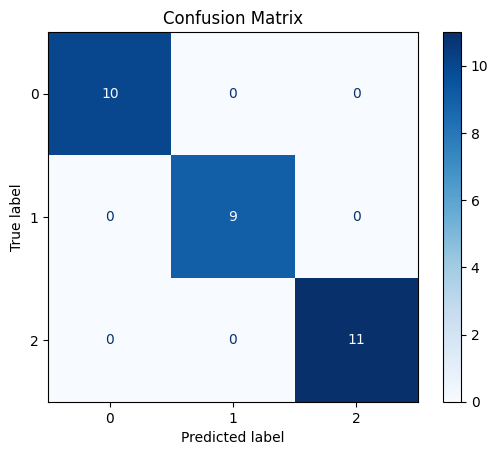

In [177]:
# Generate the confusion matrix based on the predictions and compare it to the actual label.
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: ",conf_matrix)

# Plot the confusion matrix
classes =[0,1,2]
cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = classes)
cm_display.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()

In [178]:
# Calculate Accuracy, precision and recall 

Accuracy = metrics.accuracy_score(y_test, y_pred)
Precision = metrics.precision_score(y_test, y_pred, average='macro')
Recall = metrics.recall_score(y_test, y_pred, average='macro')
print("Accuracy: ",Accuracy)
print("Precision: ",Precision)
print("Recall: ", Recall)

Accuracy:  1.0
Precision:  1.0
Recall:  1.0


In [179]:
# When we have categorised by 0,1,2 the dependent variable 'Species' we find that the accuracy, precision 
# and recall are all macro averaged to 1.0 and also our model has identified the true positives without 
# false positives and true negatives without any false negatives. So the performance or this model is good.  
